<a href="https://colab.research.google.com/github/Nihala-RI/Machine-Learning/blob/main/Agglomerative_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/wine.csv')

In [ ]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
data['Type'].unique()

array([1, 2, 3])

In [ ]:
data['Alcohol'].value_counts()

13.05    6
12.37    6
12.08    5
12.29    4
12.42    3
        ..
13.72    1
13.29    1
13.74    1
13.77    1
14.13    1
Name: Alcohol, Length: 126, dtype: int64

In [ ]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [ ]:
data[data.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


{'whiskers': [<matplotlib.lines.Line2D at 0x79c4b0e92470>,
 'caps': [<matplotlib.lines.Line2D at 0x79c4b0e92200>,
 'boxes': [<matplotlib.lines.Line2D at 0x79c4b0e91ab0>],
 'medians': [<matplotlib.lines.Line2D at 0x79c4b0e919c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79c4b0e90fd0>],
 'means': []}

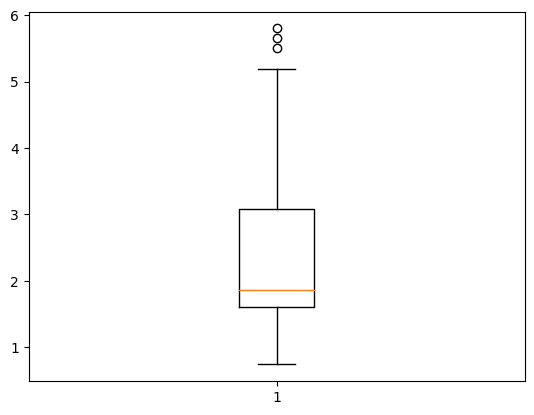

In [ ]:
plt.boxplot(data['Malic'])

{'whiskers': [<matplotlib.lines.Line2D at 0x79c4b08f0730>,
 'caps': [<matplotlib.lines.Line2D at 0x79c4b08f0c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x79c4b08f0490>],
 'medians': [<matplotlib.lines.Line2D at 0x79c4b08f1120>],
 'fliers': [<matplotlib.lines.Line2D at 0x79c4b08f13c0>],
 'means': []}

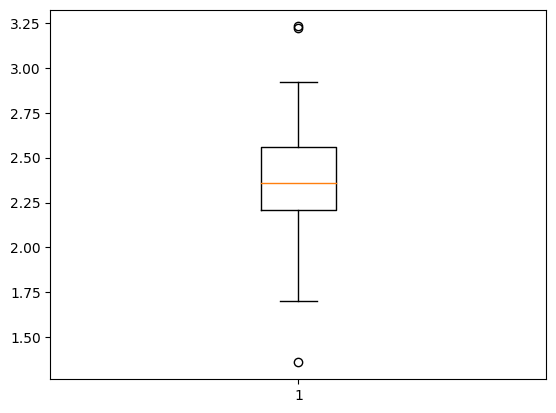

In [ ]:
plt.boxplot(data['Ash'])

{'whiskers': [<matplotlib.lines.Line2D at 0x79c4b08f46d0>,
 'caps': [<matplotlib.lines.Line2D at 0x79c4b08f4c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x79c4b08f4430>],
 'medians': [<matplotlib.lines.Line2D at 0x79c4b08f5150>],
 'fliers': [<matplotlib.lines.Line2D at 0x79c4b08f53f0>],
 'means': []}

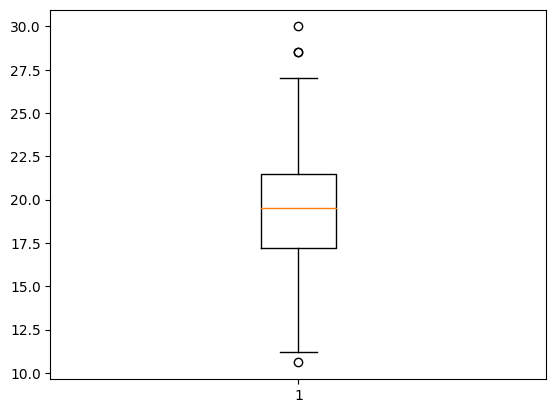

In [ ]:
plt.boxplot(data['Alcalinity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x79c4b08f7730>,
 'caps': [<matplotlib.lines.Line2D at 0x79c4b073d2a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79c4b073d0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x79c4b073d810>],
 'fliers': [<matplotlib.lines.Line2D at 0x79c4b073dab0>],
 'means': []}

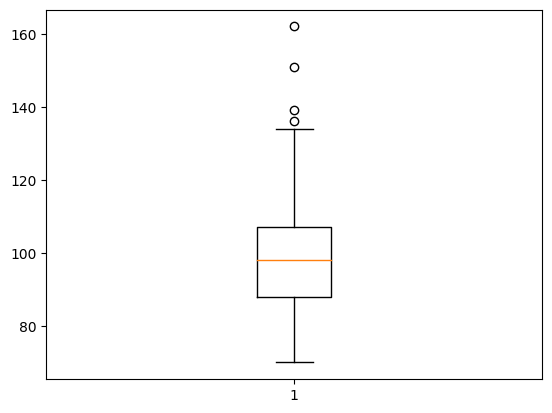

In [ ]:
plt.boxplot(data['Magnesium'])

{'whiskers': [<matplotlib.lines.Line2D at 0x79c4b0aa5b40>,
 'caps': [<matplotlib.lines.Line2D at 0x79c4b0aa5f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x79c4b0aa58a0>],
 'medians': [<matplotlib.lines.Line2D at 0x79c4b0aa64a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79c4b0aa6740>],
 'means': []}

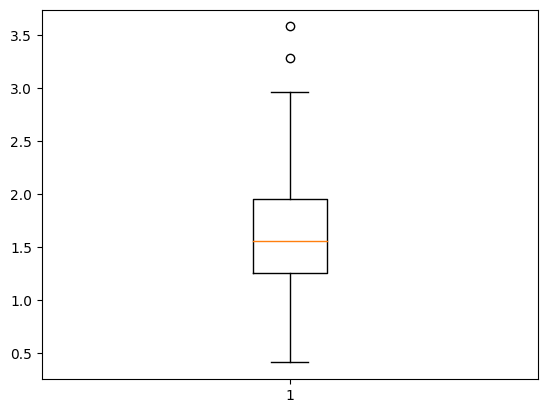

In [ ]:
plt.boxplot(data['Proanthocyanins'])

{'whiskers': [<matplotlib.lines.Line2D at 0x79c4b066cdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x79c4b066d300>,
 'boxes': [<matplotlib.lines.Line2D at 0x79c4b066c8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x79c4b066d840>],
 'fliers': [<matplotlib.lines.Line2D at 0x79c4b066dae0>],
 'means': []}

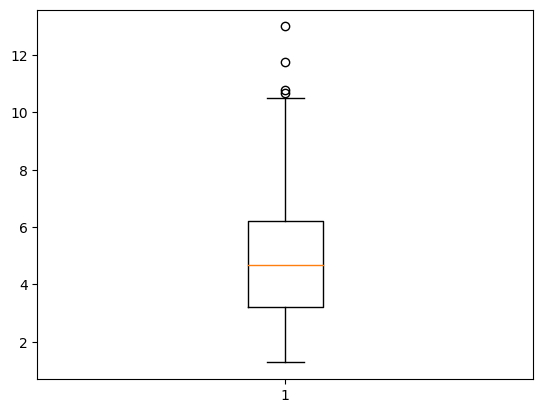

In [ ]:
plt.boxplot(data['Color'])

{'whiskers': [<matplotlib.lines.Line2D at 0x79c4b06dbb50>,
 'caps': [<matplotlib.lines.Line2D at 0x79c4b07080d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79c4b06db8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x79c4b0708610>],
 'fliers': [<matplotlib.lines.Line2D at 0x79c4b07088b0>],
 'means': []}

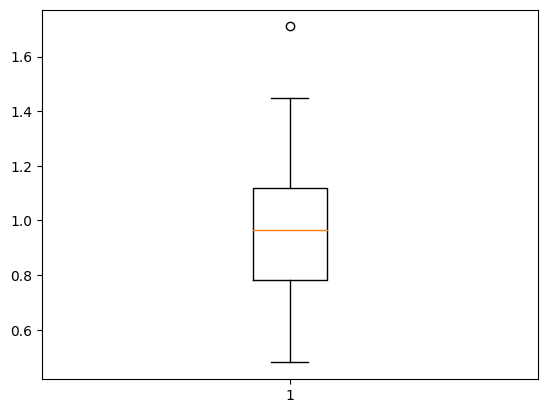

In [ ]:
plt.boxplot(data['Hue'])

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [ ]:
data=sc.fit_transform(data)

In [ ]:
pd.DataFrame(data,index=np.array(range(0:178)),columns=[Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline])

SyntaxError: ignored

In [ ]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return x

In [ ]:
data.drop(['Type'],axis=1,inplace=True)

In [ ]:
data

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
df_norm=norm_func(data)

In [ ]:
df_norm

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


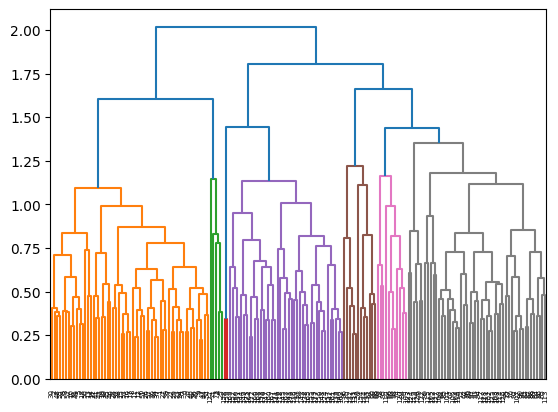

In [ ]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [ ]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [ ]:
hc.fit(df_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [ ]:
y_hc=hc.fit_predict(df_norm)
y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
data['h_clusterid']=y_hc
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [ ]:
wineclass=data.sort_values('h_clusterid')

In [ ]:
data.head(10)


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,4
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,4
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,4
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,4
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,4
